# import 

In [1]:
pip install -q seaborn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, train_size=0.8, stratify=data["Outcome"])

In [5]:
np.around(train_df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.0,614.0,614.0,614.0,614.0,614.0,614.0,614.0,614.0
mean,4.0,121.0,69.0,21.0,79.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,117.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,64.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,20.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,124.0,36.0,1.0,41.0,1.0
max,17.0,199.0,114.0,99.0,846.0,67.0,2.0,72.0,1.0


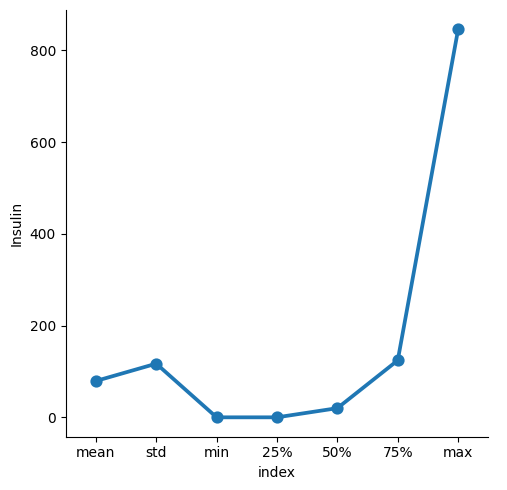

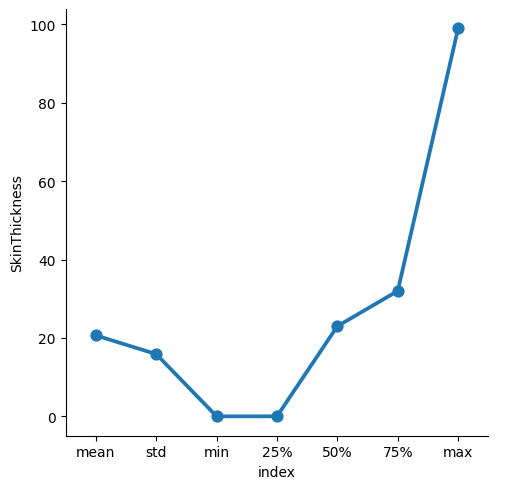

In [6]:
# Calculate descriptive statistics for numerical columns in the 'combined_df' DataFrame
describe_num_df = train_df.describe(include=['int64', 'float64'])

# Reset the index of the descriptive statistics DataFrame for improved clarity
describe_num_df.reset_index(inplace=True)

# Exclude the row containing 'count' information, as it is not the focus of visualization
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']

# Iterate over each numerical column in 'num_col' for visualization
for col in ["Insulin", "SkinThickness"]:
    # Skip the 'index' column to maintain the coherence of the visualization
    if col in 'index':
        continue
    
    # Create a factor plot using seaborn to visually represent the distribution of values
    sns.catplot(x='index', y=col, data=describe_num_df, kind='point')
    
    # Display the generated plot
    plt.show()

In [7]:
train_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: ylabel='count'>

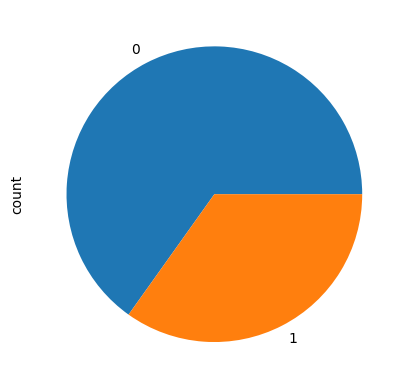

In [8]:
train_df["Outcome"].value_counts().plot(kind='pie')

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

# EDA

In [9]:
train_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

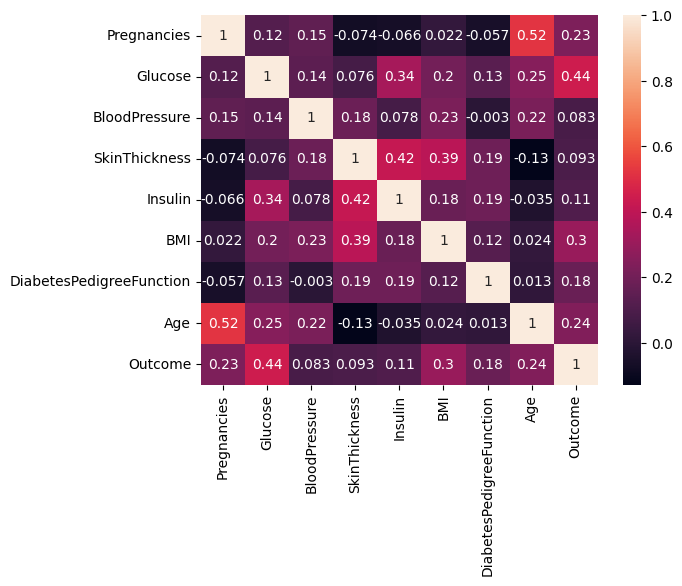

In [10]:
sns.heatmap(train_df.corr(), annot=True)

In [11]:
train_df.corr().Outcome

Pregnancies                 0.232582
Glucose                     0.440738
BloodPressure               0.083420
SkinThickness               0.092570
Insulin                     0.108609
BMI                         0.301864
DiabetesPedigreeFunction    0.179878
Age                         0.239731
Outcome                     1.000000
Name: Outcome, dtype: float64

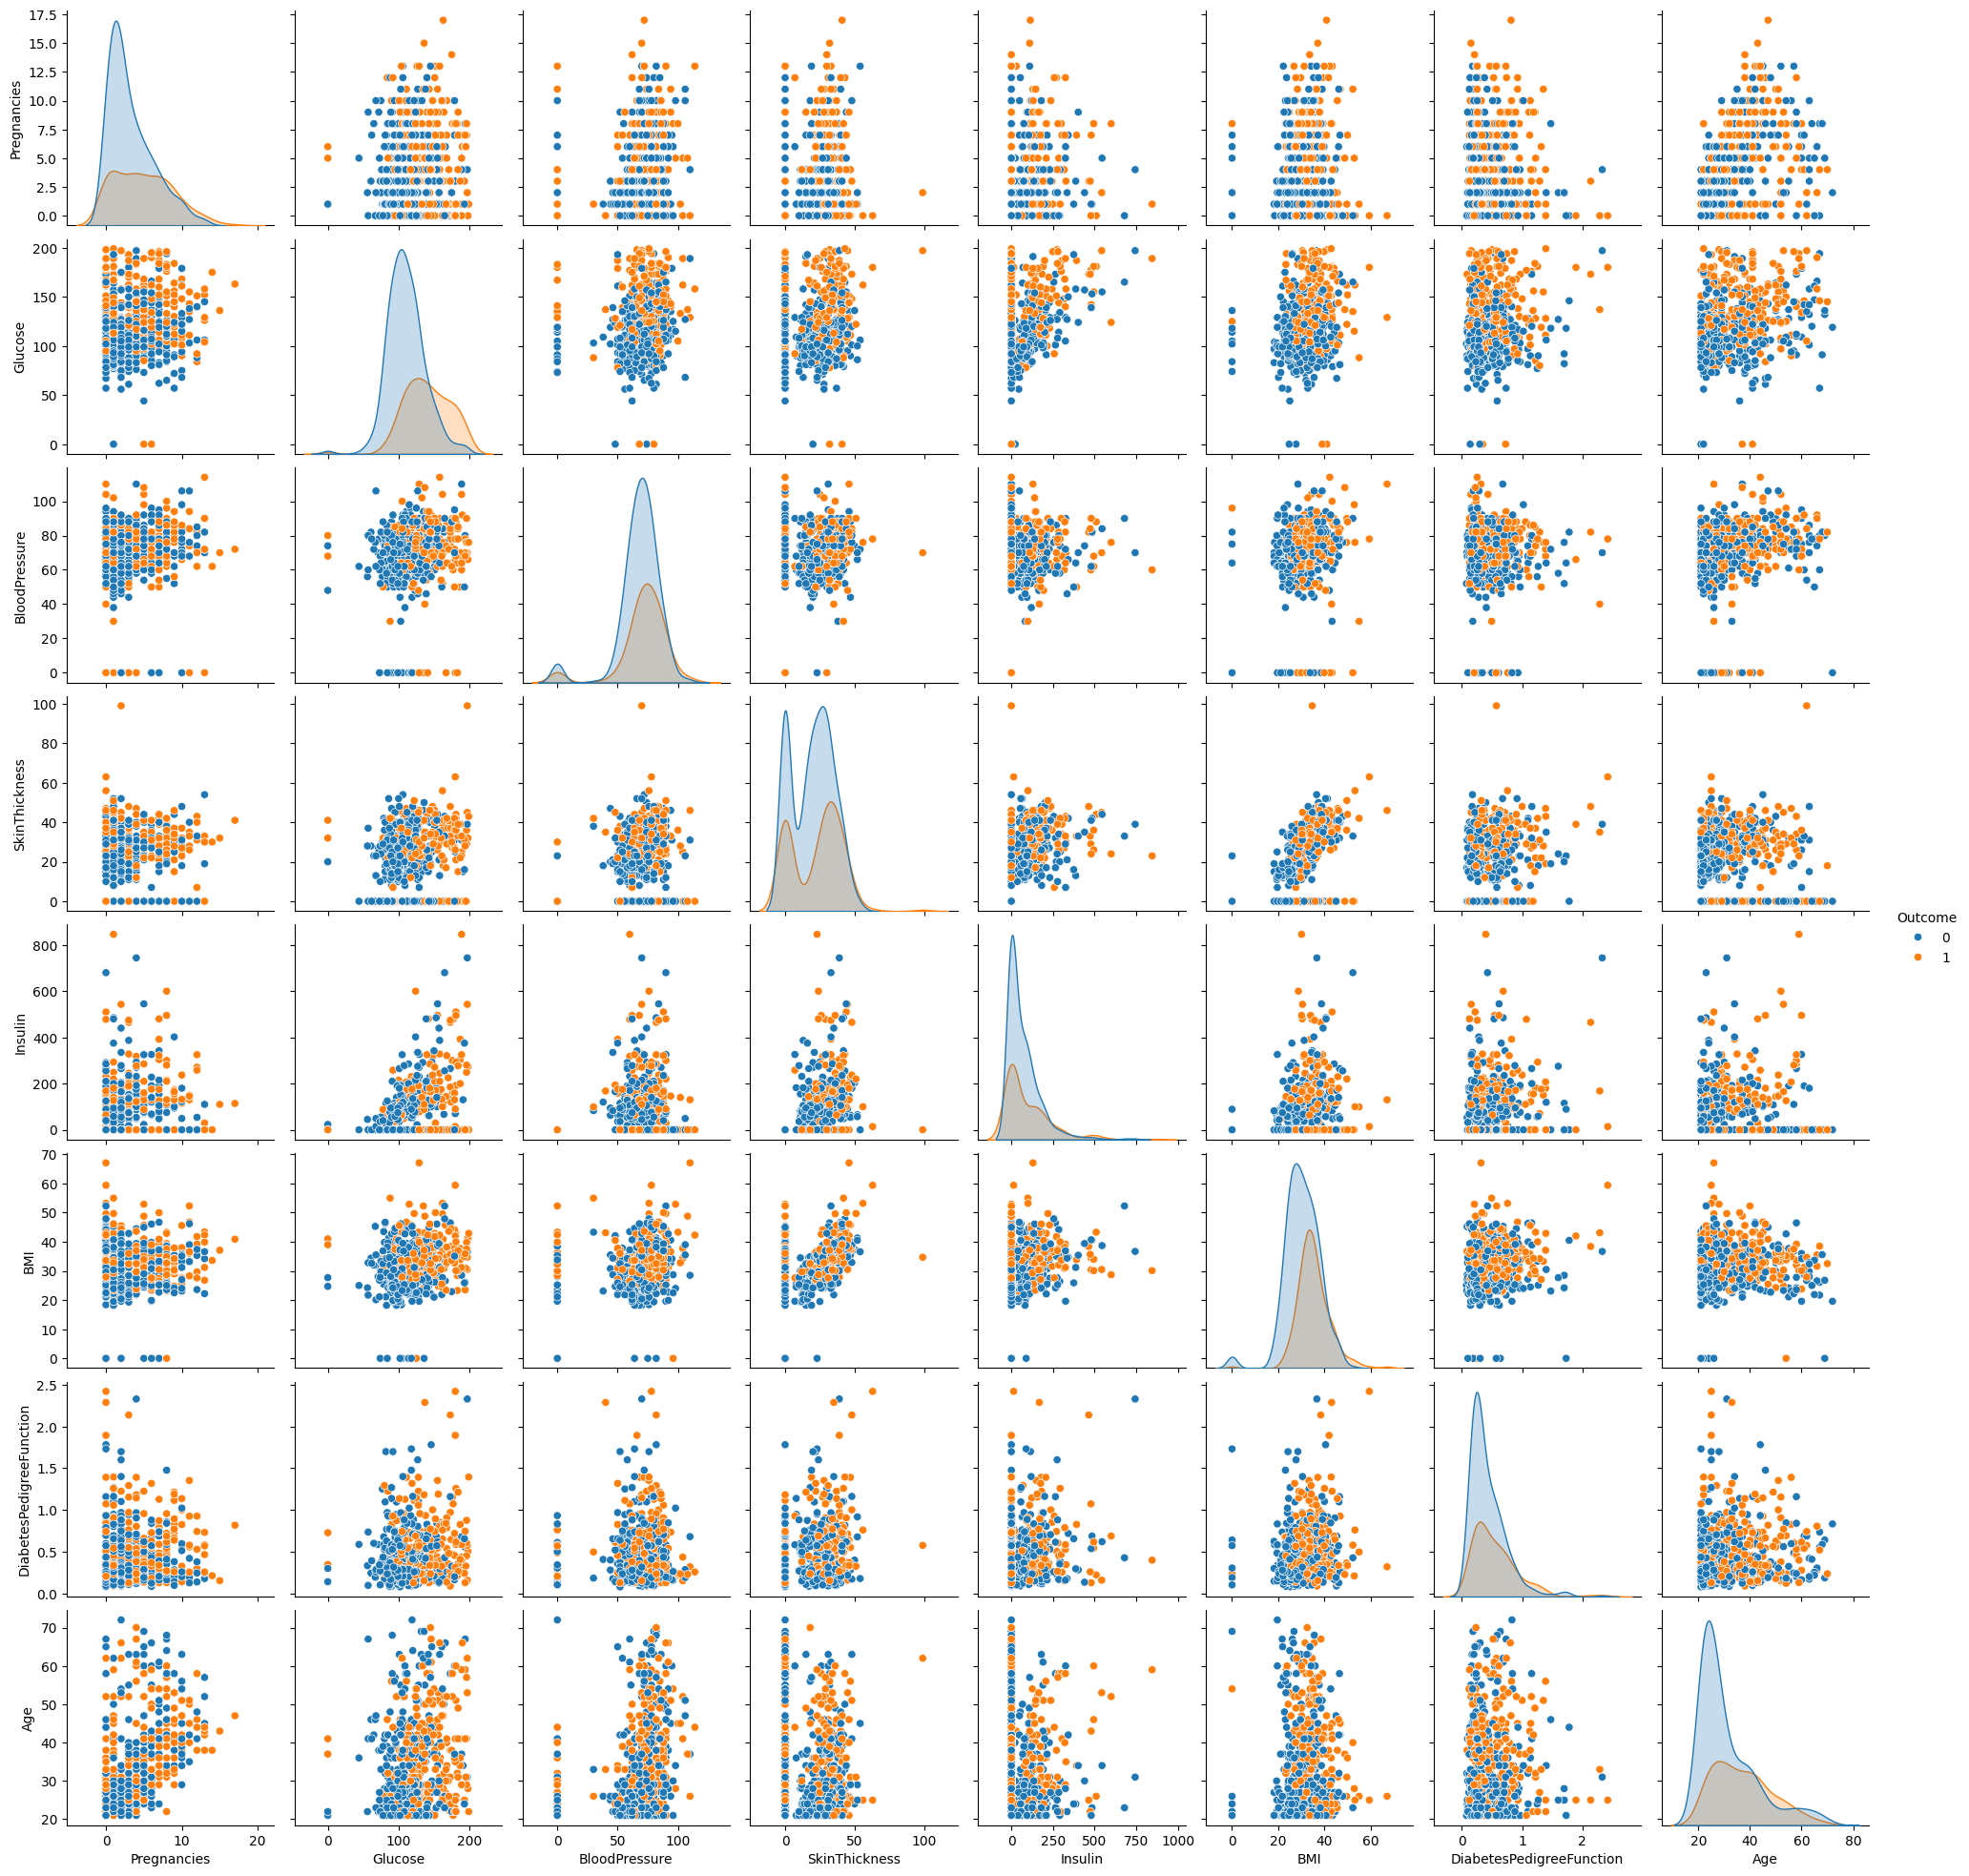

In [12]:
sns.pairplot(train_df, hue='Outcome')

/tmp/ipykernel_676/3445252745.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome',y='Glucose' ,data=train_df, palette='rainbow')


<Axes: xlabel='Outcome', ylabel='Glucose'>

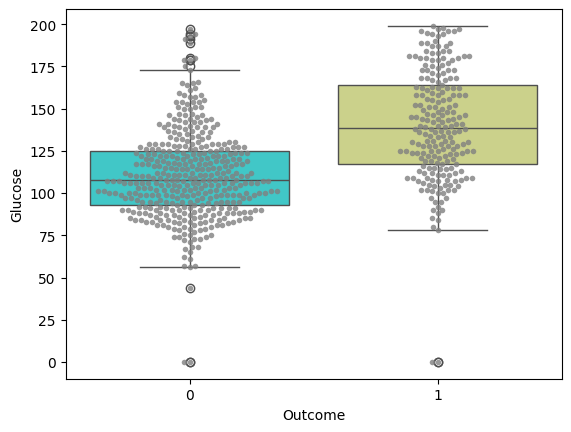

In [13]:
sns.boxplot(x='Outcome',y='Glucose' ,data=train_df, palette='rainbow')
sns.swarmplot(x='Outcome',y='Glucose' ,data=train_df, dodge=True, alpha=.8,color='grey',s=4)

the graph shows that glucose has an important affect one the outcome, is it true??

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

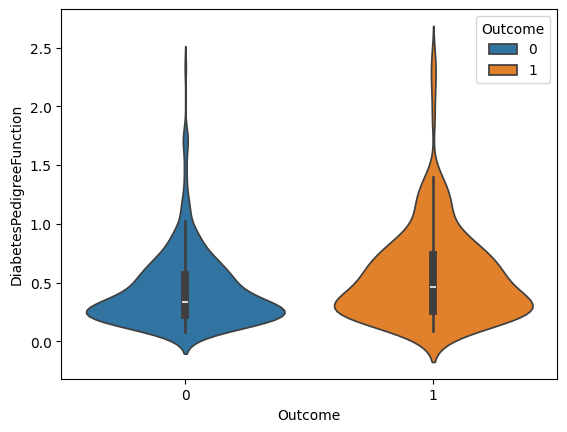

In [14]:
sns.violinplot(data=train_df, x="Outcome", y="DiabetesPedigreeFunction", hue='Outcome')

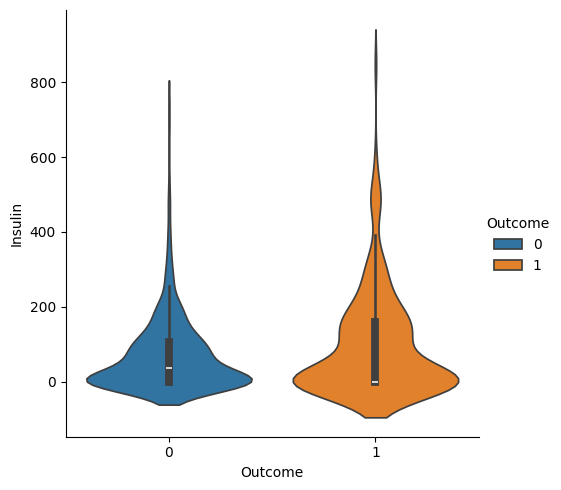

In [15]:
sns.catplot(data=train_df, x='Outcome', y='Insulin', kind='violin', hue='Outcome')

In [16]:
nulled_X = train_df.drop(["Outcome", "Pregnancies"], axis=1).replace({0:None})
nulled_X["Pregnancies"] = train_df["Pregnancies"]

In [17]:
nulled_df = pd.concat([nulled_X, train_df["Outcome"]], axis=1)

In [18]:
pip install -q missingno


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<Axes: >

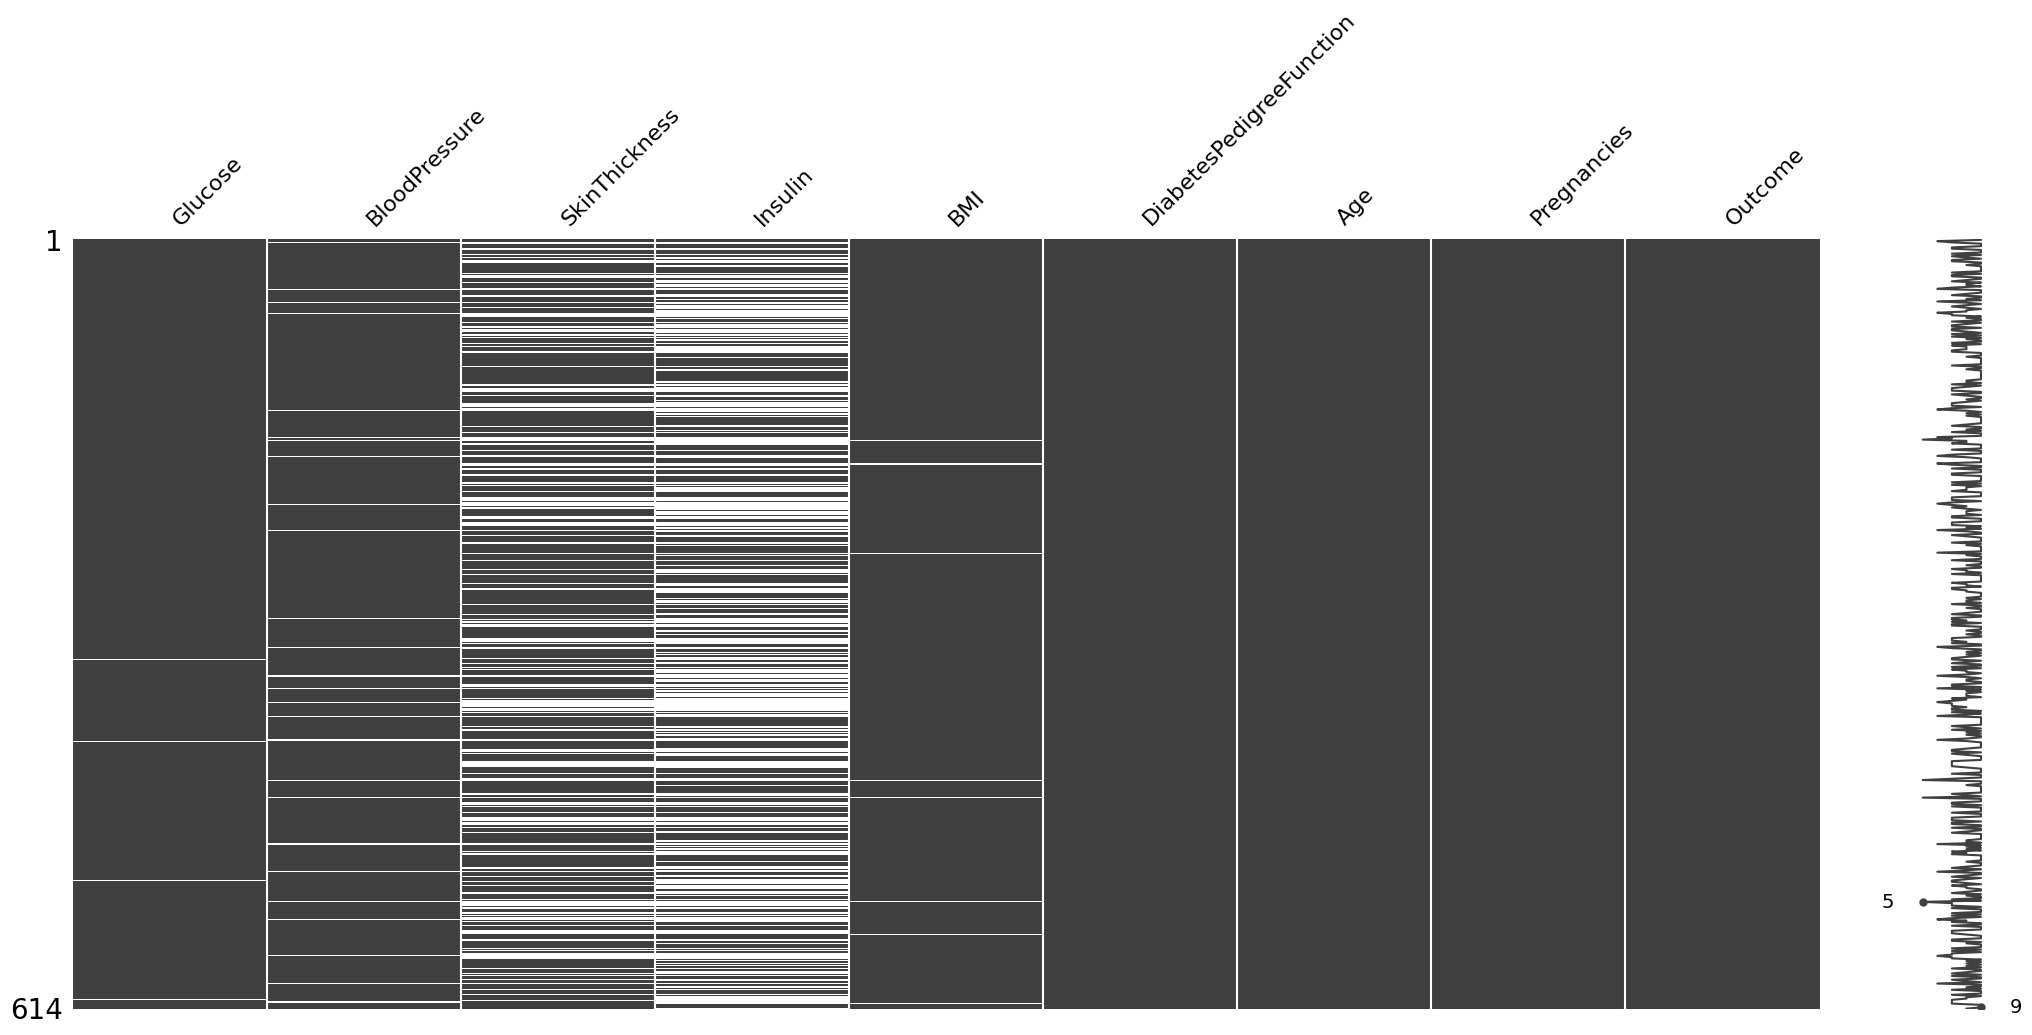

In [19]:
import missingno as msno
msno.matrix(nulled_df)

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.impute import KNNImputer

ct = make_column_transformer(
    (KNNImputer(),nulled_df.columns[:-1]), remainder='passthrough'
)
df =  pd.DataFrame(ct.fit_transform(nulled_df), columns=nulled_df.columns)

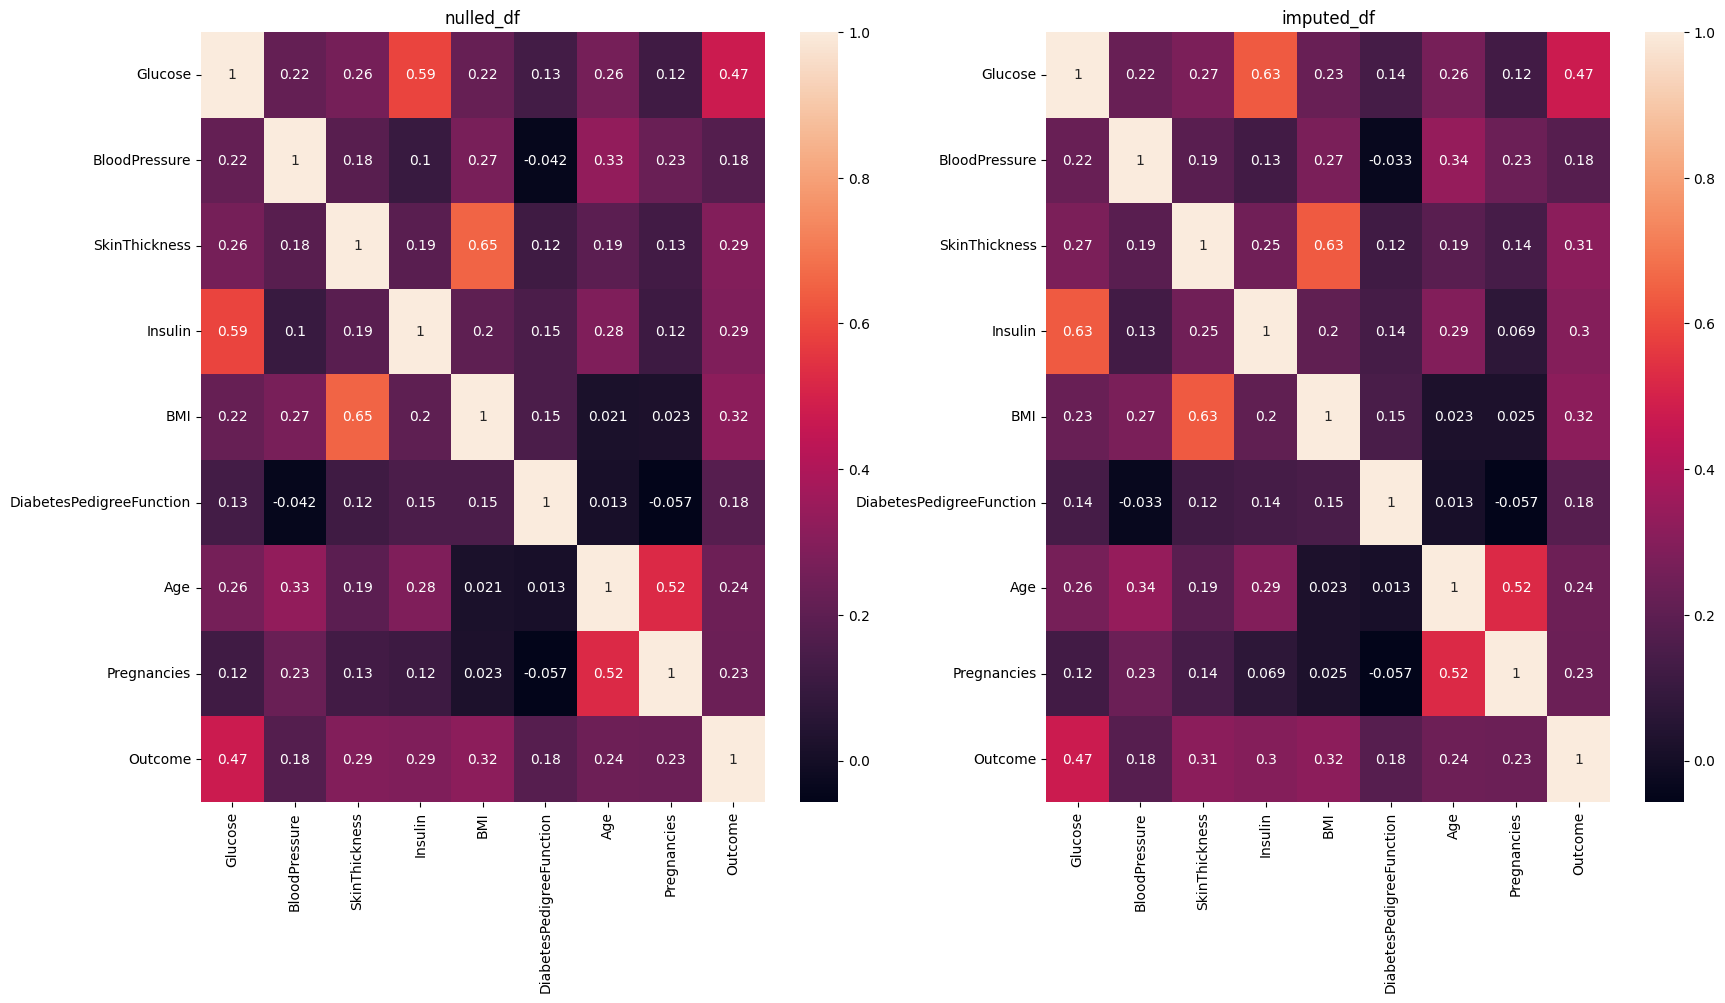

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(nulled_df.corr(), annot=True, ax=ax1)
sns.heatmap(df.corr(), annot=True, ax=ax2)
ax1.set_title("nulled_df")
ax2.set_title("imputed_df");
plt.show();

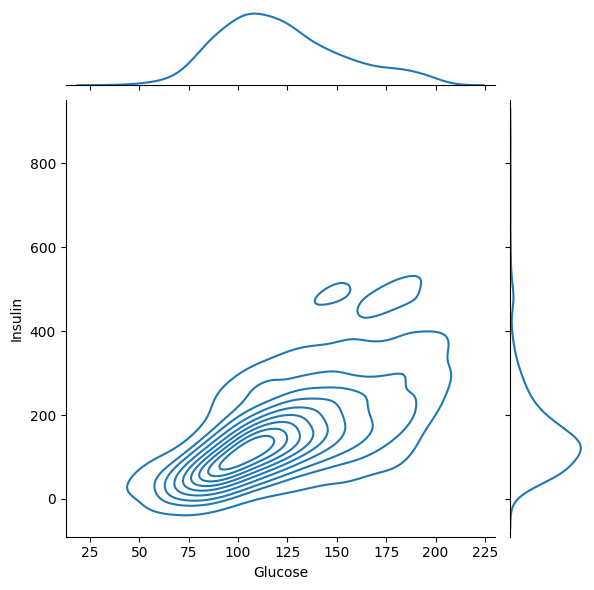

In [22]:
sns.jointplot(data=df, x='Glucose', y='Insulin', kind="kde");

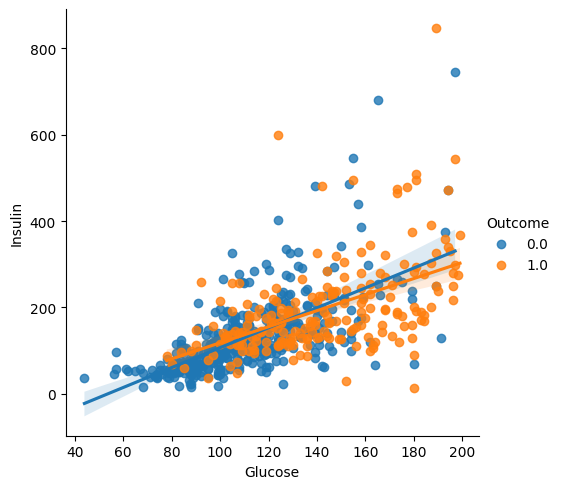

In [23]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

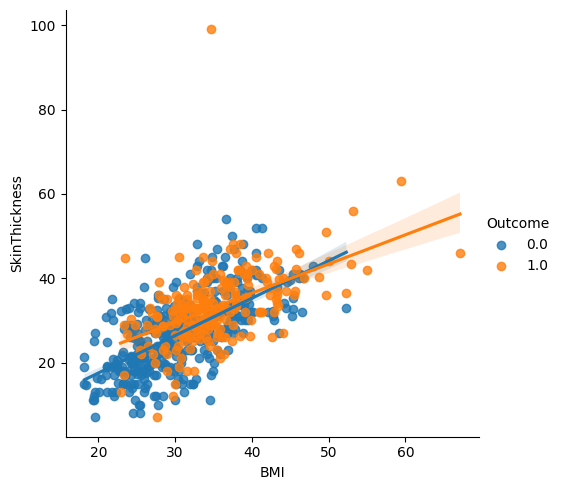

In [24]:
sns.lmplot(data=df, x="BMI", y="SkinThickness", hue="Outcome")

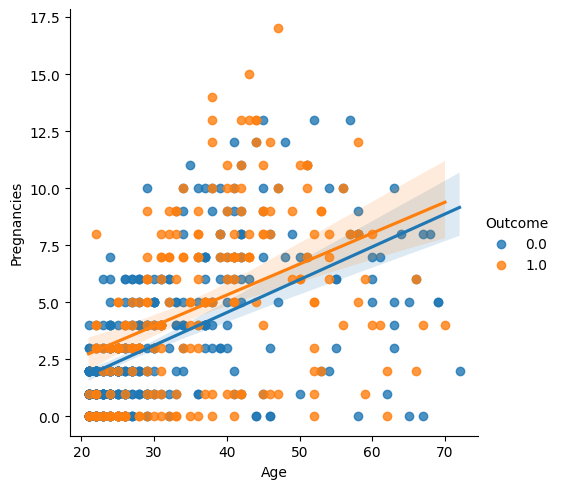

In [25]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome")

In [26]:
# Features Creating

# is pregnancy
# Let's creat new variable calls "Pregnancies_yes_no".
# Yes means being pregnacy otherwise no
df.loc[((df['Pregnancies']) > 0), "Pregnancies_yes_no"] = "yes"
df.loc[((df['Pregnancies']) == 0), "Pregnancies_yes_no"] = "no"

# risk level according to having diabete or not as ages
#Adapting the WHO (World Health Organization) datas
df.loc[(df['Age'] > 20) & (df['Age'] < 34),'age_vs_diabete'] = 'low_risky'
df.loc[(df['Age'] >= 35) & (df['Age'] < 44), 'age_vs_diabete'] = 'risky'
df.loc[(df['Age'] >= 45) & (df['Age'] < 54),'age_vs_diabete'] = 'too_risky'
df.loc[(df['Age'] >= 55),'age_vs_diabete'] = 'high_risky'

# glucose and levels
# These levels are determined according to the accepted glucose values.
df.loc[(df['Glucose'] > 0) & (df['Glucose'] < 70), 'level_glucose'] = 'hypoglosemia'
df.loc[(df['Glucose'] >= 71) & (df['Glucose'] < 100), 'level_glucose'] = 'normall'
df.loc[(df['Glucose'] >= 101) & (df['Glucose'] < 125), 'level_glucose'] = 'hidden_diabete'
df.loc[(df['Glucose'] >= 126), 'level_glucose'] = 'diabete'

# age level
df.loc[(df['Age'] < 18), 'new_age'] = 'young'
df.loc[(df['Age'] >= 19) & (df['Age'] < 55), 'new_age'] = 'mature'
df.loc[(df['Age'] >= 56), 'new_age'] = 'older'

#BMI level
#These levels are determined according to the
# accepted Body mass indicator (BMI) values.
df.loc[(df['BMI'] < 18),'new_BMI'] = 'unhealthy'
df.loc[(df['BMI'] >= 19) & (df['BMI'] < 25), 'new_BMI'] = 'normall'
df.loc[(df['BMI'] >= 26) & (df['BMI'] < 30),'new_BMI'] = 'overweight'
df.loc[(df['BMI'] >= 31),'new_BMI'] = 'obese'

#Insulin level
#In this problem 2 hours after glucose administration
#16-166 mIU/L is normal level of Insulin.
df.loc[(df['Insulin'] >= 16) & (df['Insulin'] <= 166) , 'new_Insulin'] = 'normal'
df.loc[(df['Insulin'] < 16), 'new_Insulin'] = 'not_normal'
df.loc[(df['Insulin'] > 166) ,'new_Insulin'] = 'not_normal'
df.loc[(df['Insulin'] == 0.0 ), 'new_Insulin'] = 'not_normal'

# train

## traditinoal ML algorithms

In [27]:
pip install -q imblearn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE

In [29]:
train_df[["Pregnancies","Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]] = data[["Pregnancies","Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

test_df[["Pregnancies","Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]] = data[["Pregnancies","Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [30]:
X_train, y_train = train_df.drop("Outcome", axis=1), train_df["Outcome"]
X_test, y_test = test_df.drop("Outcome", axis=1), test_df["Outcome"]

In [31]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression pipeline
lr_pipeline = Pipeline([
    ('knn', KNNImputer()),
    ('robust', RobustScaler()),
    ('smote', SMOTE()),
    ('logreg', LogisticRegression())
])

# Parameter grid for Logistic Regression
param_grid_lr = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'robust__quantile_range': [(25.0, 75.0), (10.0, 90.0)],
    'logreg__penalty': ['l2'],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logreg__max_iter': [100, 200, 300],
}

# Create GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy for Logistic Regression
print("Best Parameters (Logistic Regression): ", grid_search_lr.best_params_)
print("Best Accuracy (Logistic Regression): ", grid_search_lr.best_score_)


Best Parameters (Logistic Regression):  {'knn__n_neighbors': 7, 'logreg__C': 10, 'logreg__max_iter': 300, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear', 'robust__quantile_range': (25.0, 75.0)}
Best Accuracy (Logistic Regression):  0.7702652272424364


In [32]:
from sklearn.metrics import classification_report
y_pred = grid_search_lr.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       100
           1       0.63      0.76      0.69        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154



In [ ]:
# from sklearn.svm import SVC

# # SVM pipeline
# svm_pipeline = Pipeline([
#     ('knn', KNNImputer()),
#     ('robust', RobustScaler()),
#     ('standard', StandardScaler()),
#     ('smote', SMOTE()),
#     ('svm', SVC())
# ])

# # Parameter grid for SVM
# param_grid_svm = {
#     'knn__n_neighbors': [3, 5, 7, 9],
#     'robust__quantile_range': [(25.0, 75.0), (10.0, 90.0)],
#     'svm__C': [0.1, 1, 10, 100],
#     'svm__kernel': ['linear', 'rbf', 'poly'],
#     'svm__degree': [2, 3, 4],
#     'svm__gamma': ['scale', 'auto', 0.1, 1],
#     'svm__class_weight': [None, 'balanced']
# }

# # Create GridSearchCV for SVM
# grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search_svm.fit(X_train, y_train)

# # Print the best parameters and corresponding accuracy for SVM
# print("Best Parameters (SVM): ", grid_search_svm.best_params_)
# print("Best Accuracy (SVM): ", grid_search_svm.best_score_)


In [33]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier pipeline
rf_pipeline = Pipeline([
    ('knn', KNNImputer()),
    ('robust', RobustScaler()),
    ('smote', SMOTE()),
    ('rf', RandomForestClassifier())
])

# Parameter grid for RandomForestClassifier
param_grid_rf = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'robust__quantile_range': [(25.0, 75.0), (10.0, 90.0)],
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__bootstrap': [True, False],
}

# Create GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy for RandomForestClassifier
print("Best Parameters (RandomForestClassifier): ", grid_search_rf.best_params_)
print("Best Accuracy (RandomForestClassifier): ", grid_search_rf.best_score_)


Best Parameters (RandomForestClassifier):  {'knn__n_neighbors': 7, 'rf__bootstrap': True, 'rf__max_depth': None, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100, 'robust__quantile_range': (25.0, 75.0)}
Best Accuracy (RandomForestClassifier):  0.7703185392509664


In [34]:
y_pred = grid_search_rf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       100
           1       0.67      0.74      0.70        54

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154



In [35]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost pipeline
adaboost_pipeline = Pipeline([
    ('knn', KNNImputer()),
    ('robust', RobustScaler()),
    ('smote', SMOTE()),
    ('adaboost', AdaBoostClassifier())
])

# Parameter grid for AdaBoost
param_grid_adaboost = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'robust__quantile_range': [(25.0, 75.0), (10.0, 90.0)],
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1]
}

# Create GridSearchCV for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost_pipeline, param_grid_adaboost, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_adaboost.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy for AdaBoost
print("Best Parameters (AdaBoost): ", grid_search_adaboost.best_params_)
print("Best Accuracy (AdaBoost): ", grid_search_adaboost.best_score_)

Best Parameters (AdaBoost):  {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 50, 'knn__n_neighbors': 7, 'robust__quantile_range': (25.0, 75.0)}
Best Accuracy (AdaBoost):  0.7524456883913101


In [36]:
y_pred = grid_search_adaboost.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.66      0.74      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



In [37]:
!pip install -q xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [38]:
from xgboost import XGBClassifier

# AdaBoost pipeline
xgb_pipeline = Pipeline([
    ('knn', KNNImputer()),
    ('robust', RobustScaler()),
    ('smote', SMOTE()),
    ('xgb', XGBClassifier())
])

# Parameter grid for AdaBoost
param_grid_xgb = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'robust__quantile_range': [(25.0, 75.0), (10.0, 90.0)],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
}

# Create GridSearchCV for AdaBoost
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy for AdaBoost
print("Best Parameters (xgb): ", grid_search_xgb.best_params_)
print("Best Accuracy (xgb): ", grid_search_xgb.best_score_)

Best Parameters (xgb):  {'knn__n_neighbors': 9, 'robust__quantile_range': (25.0, 75.0), 'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 5, 'xgb__n_estimators': 50, 'xgb__subsample': 0.8}
Best Accuracy (xgb):  0.7686525389844062


In [39]:
y_pred = grid_search_xgb.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       100
           1       0.65      0.78      0.71        54

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.77      0.78       154

